In [1]:
import sys
sys.path.append('../Documents/GitHub/PGM/utilities/')
sys.path.append('../Documents/GitHub/PGM/source/')
import numpy as np
import rbm
import matplotlib.pyplot as plt
%matplotlib inline

../Documents/GitHub/PGM/source/numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
../Documents/GitHub/PGM/source/numba_utilities.py:1125: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
../Documents/GitHub/PGM/source/numba_utilities.py:1126: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
../Documents/GitHub/PGM/source/numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights


# Generate synthetic dataset
Generate dataset of continuous, non-negative, correlated signals.
Steps:
1. Generate a random covariance matrix (J. J.T)
2. Generate a random mean vector (- threshold).
3. Draw a gaussian vector $X \sim \mathcal{N}( \mu, \Sigma)$
4. Threshold at zero: $X = max(X,0)$


In [2]:
B = 1000
N = 10

J = np.random.randn(N,N)
threshold = np.maximum(np.random.randn(N) , 0)

X0 = np.random.randn(B,N)
X = np.maximum(np.dot(X0,J) - threshold[np.newaxis,:], 0)
X = X.astype(np.float32)


# Data visualizations

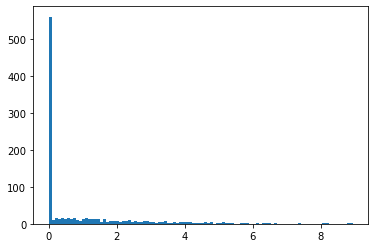

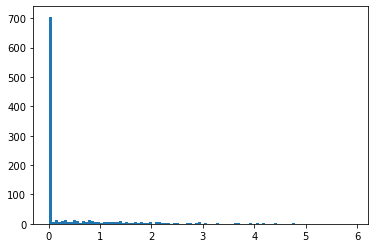

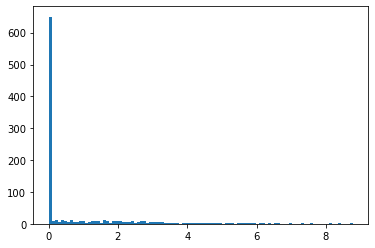

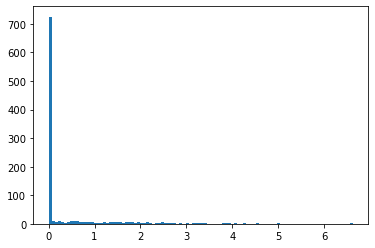

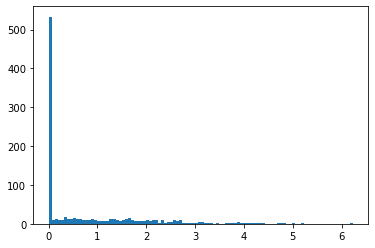

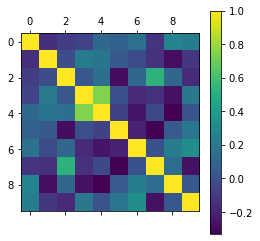

In [3]:
for i in range(5):
    plt.hist(X[:,i],bins=100); plt.show() # Histogram of marginal distributions.
plt.matshow(np.corrcoef(X.T)); plt.colorbar(); plt.show() # Correlation matrix.

# Training
We fit it with an RBM with ReLU+ visible unit potential (= truncated gaussian conditional distribution) and a dReLU hidden unit potential.

Importantly, the learning rate must be set lower to avoid numerical instability.
Indeed, for continuous visible, the distribution is not well-defined for all variables. Consider the Gaussian potential for both visible and hidden units. The marginal writes:

$$ P(v) = e^{- \frac{1}{2} h^T J h - g^t h}$$

With $$J = Diag(\gamma_v) - W^T Diag(\gamma_h) W$$

The above equation is well-defined only for positive definite precision matrix $J$. In practice, for an overly large learning rate, SGD training can result in apparition of negative eigenvalue, and the dynamics v->h->v becomes divergent.


In [85]:


RBM = rbm.RBM(n_v = N,n_h=10,
              visible='ReLUplus', # P(v|h) is a gaussian truncated at zero TN(mu,\sigma, 0)
              hidden='dReLU' # dReLU potential. In case of numerical instability, try Bernoulli.
             )
print(RBM.likelihood(X).mean()) # Evaluate likelihood before training.
results = RBM.fit(X,
                  learning_rate= 1e-3, # Lower learning rate (default for continuous hidden units).
                  n_iter=2000,
                  verbose=0,vverbose=1,N_MC=5,
                  record=['v_gamma','v_theta'],record_interval=1
                 );
print(RBM.likelihood(X,recompute_Z=True).mean() ) # Evaluate likelihood after training.

-19.665949
Starting epoch 1
Mismatch dimensions (10, 10), [100, 10], reinitializating I
Mismatch dimensions (10, 10), [100, 10], reinitializating I
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch

../Documents/GitHub/PGM/source/layer.py:1225: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)
../Documents/GitHub/PGM/source/layer.py:1188: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)


Starting epoch 61
Starting epoch 62
Starting epoch 63
Starting epoch 64
Starting epoch 65
Starting epoch 66
Starting epoch 67
Starting epoch 68
Starting epoch 69
Starting epoch 70
Starting epoch 71
Starting epoch 72
Starting epoch 73
Starting epoch 74
Starting epoch 75
Starting epoch 76
Starting epoch 77
Starting epoch 78
Starting epoch 79
Starting epoch 80
Starting epoch 81
Starting epoch 82
Starting epoch 83
Starting epoch 84
Starting epoch 85
Starting epoch 86
Starting epoch 87
Starting epoch 88
Starting epoch 89
Starting epoch 90
Starting epoch 91
Starting epoch 92
Starting epoch 93
Starting epoch 94
Starting epoch 95
Starting epoch 96
Starting epoch 97
Starting epoch 98
Starting epoch 99
Starting epoch 100
Starting epoch 101
Starting epoch 102
Starting epoch 103
Starting epoch 104
Starting epoch 105
Starting epoch 106
Starting epoch 107
Starting epoch 108
Starting epoch 109
Starting epoch 110
Starting epoch 111
Starting epoch 112
Starting epoch 113
Starting epoch 114
Starting epoc

Starting epoch 499
Starting epoch 500
Starting epoch 501
Starting epoch 502
Starting epoch 503
Starting epoch 504
Starting epoch 505
Starting epoch 506
Starting epoch 507
Starting epoch 508
Starting epoch 509
Starting epoch 510
Starting epoch 511
Starting epoch 512
Starting epoch 513
Starting epoch 514
Starting epoch 515
Starting epoch 516
Starting epoch 517
Starting epoch 518
Starting epoch 519
Starting epoch 520
Starting epoch 521
Starting epoch 522
Starting epoch 523
Starting epoch 524
Starting epoch 525
Starting epoch 526
Starting epoch 527
Starting epoch 528
Starting epoch 529
Starting epoch 530
Starting epoch 531
Starting epoch 532
Starting epoch 533
Starting epoch 534
Starting epoch 535
Starting epoch 536
Starting epoch 537
Starting epoch 538
Starting epoch 539
Starting epoch 540
Starting epoch 541
Starting epoch 542
Starting epoch 543
Starting epoch 544
Starting epoch 545
Starting epoch 546
Starting epoch 547
Starting epoch 548
Starting epoch 549
Starting epoch 550
Starting epo

Starting epoch 936
Starting epoch 937
Starting epoch 938
Starting epoch 939
Starting epoch 940
Starting epoch 941
Starting epoch 942
Starting epoch 943
Starting epoch 944
Starting epoch 945
Starting epoch 946
Starting epoch 947
Starting epoch 948
Starting epoch 949
Starting epoch 950
Starting epoch 951
Starting epoch 952
Starting epoch 953
Starting epoch 954
Starting epoch 955
Starting epoch 956
Starting epoch 957
Starting epoch 958
Starting epoch 959
Starting epoch 960
Starting epoch 961
Starting epoch 962
Starting epoch 963
Starting epoch 964
Starting epoch 965
Starting epoch 966
Starting epoch 967
Starting epoch 968
Starting epoch 969
Starting epoch 970
Starting epoch 971
Starting epoch 972
Starting epoch 973
Starting epoch 974
Starting epoch 975
Starting epoch 976
Starting epoch 977
Starting epoch 978
Starting epoch 979
Starting epoch 980
Starting epoch 981
Starting epoch 982
Starting epoch 983
Starting epoch 984
Starting epoch 985
Starting epoch 986
Starting epoch 987
Starting epo

Starting epoch 1354
Starting epoch 1355
Starting epoch 1356
Starting epoch 1357
Starting epoch 1358
Starting epoch 1359
Starting epoch 1360
Starting epoch 1361
Starting epoch 1362
Starting epoch 1363
Starting epoch 1364
Starting epoch 1365
Starting epoch 1366
Starting epoch 1367
Starting epoch 1368
Starting epoch 1369
Starting epoch 1370
Starting epoch 1371
Starting epoch 1372
Starting epoch 1373
Starting epoch 1374
Starting epoch 1375
Starting epoch 1376
Starting epoch 1377
Starting epoch 1378
Starting epoch 1379
Starting epoch 1380
Starting epoch 1381
Starting epoch 1382
Starting epoch 1383
Starting epoch 1384
Starting epoch 1385
Starting epoch 1386
Starting epoch 1387
Starting epoch 1388
Starting epoch 1389
Starting epoch 1390
Starting epoch 1391
Starting epoch 1392
Starting epoch 1393
Starting epoch 1394
Starting epoch 1395
Starting epoch 1396
Starting epoch 1397
Starting epoch 1398
Starting epoch 1399
Starting epoch 1400
Starting epoch 1401
Starting epoch 1402
Starting epoch 1403


Starting epoch 1767
Starting epoch 1768
Starting epoch 1769
Starting epoch 1770
Starting epoch 1771
Starting epoch 1772
Starting epoch 1773
Starting epoch 1774
Starting epoch 1775
Starting epoch 1776
Starting epoch 1777
Starting epoch 1778
Starting epoch 1779
Starting epoch 1780
Starting epoch 1781
Starting epoch 1782
Starting epoch 1783
Starting epoch 1784
Starting epoch 1785
Starting epoch 1786
Starting epoch 1787
Starting epoch 1788
Starting epoch 1789
Starting epoch 1790
Starting epoch 1791
Starting epoch 1792
Starting epoch 1793
Starting epoch 1794
Starting epoch 1795
Starting epoch 1796
Starting epoch 1797
Starting epoch 1798
Starting epoch 1799
Starting epoch 1800
Starting epoch 1801
Starting epoch 1802
Starting epoch 1803
Starting epoch 1804
Starting epoch 1805
Starting epoch 1806
Starting epoch 1807
Starting epoch 1808
Starting epoch 1809
Starting epoch 1810
Starting epoch 1811
Starting epoch 1812
Starting epoch 1813
Starting epoch 1814
Starting epoch 1815
Starting epoch 1816


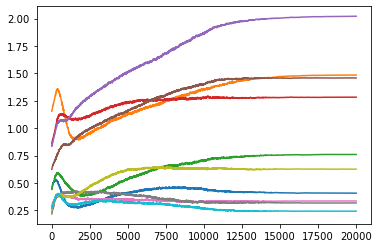

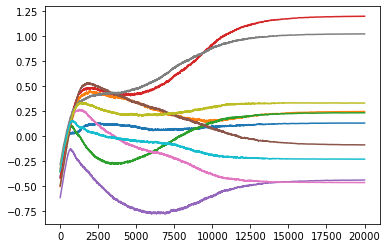

In [86]:
plt.plot(results['v_gamma']); plt.show()
plt.plot(results['v_theta']); plt.show()

In [83]:
datav, datah = RBM.gen_data(Nthermalize=1000,Nstep=100,Nchains=100,Lchains=100)

Mismatch dimensions (10, 10), [100, 10], reinitializating I
Mismatch dimensions (10, 10), [100, 10], reinitializating I


In [99]:
mu_vh_data.shape

(1000, 1000)

Text(0.5, 1.0, 'Convergence of <vh>, r = 1.00')

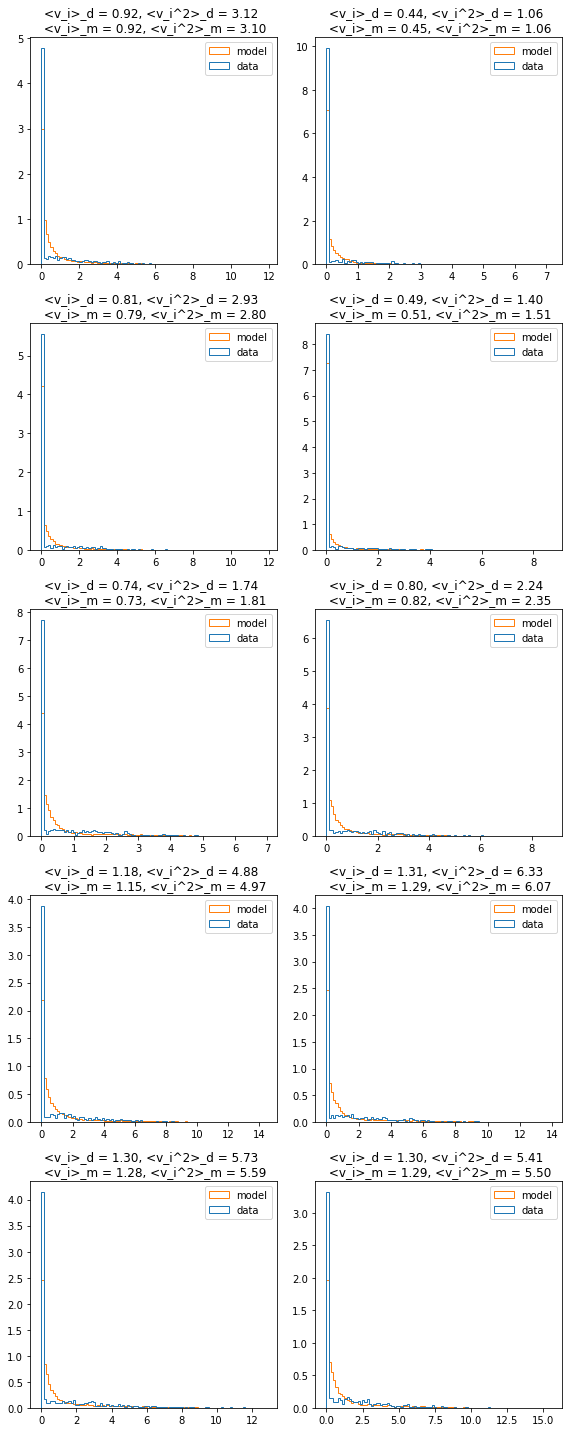

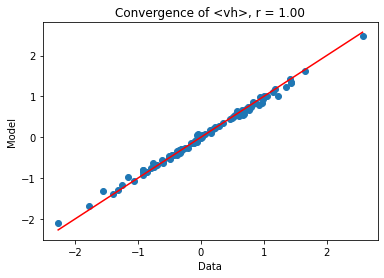

In [101]:
fig, ax = plt.subplots(5,2, figsize=(4*2,4*5))

for u in range(10):
    ax_ = ax[u//2,u%2]
    ax_.hist([X[:,u],datav[:,u],],bins=100,density=True,log=False,histtype='step',
            label=['data','model']);
    ax_.set_title(
        '<v_i>_d = %.2f, <v_i^2>_d = %.2f \n <v_i>_m = %.2f, <v_i^2>_m = %.2f'%(
    X[:,u].mean(),
    (X[:,u]**2).mean(),            
    datav[:,u].mean(),
    (datav[:,u]**2).mean()
        )
    )
    ax_.legend()
plt.tight_layout()
    


mu_vh_data = np.dot(RBM.mean_hiddens(X).T,X)/len(X)
mu_vh_model = np.dot(RBM.mean_hiddens(datav).T,datav)/len(datav)

fig, ax = plt.subplots()
plt.scatter(mu_vh_data,mu_vh_model)
ax.plot([mu_vh_data.min(),mu_vh_data.max()],[mu_vh_data.min(),mu_vh_data.max()],c='red')
ax.set_xlabel('Data')
ax.set_ylabel('Model')
ax.set_title('Convergence of <vh>, r = %.2f'%np.corrcoef(mu_vh_data.flatten(),mu_vh_model.flatten())[0,1])


## Same experiment with a larger learning rate
Sometimes, the training is interrupted due to large gradients (try a few runs). The model parameters are finite

This is because despite finite model parameters, the MCMC samples go to infinity. 
It suggests the dynamical system (v->h ->v) is not stable (at least one jacobian eigenvalue larger than 1)



In [105]:
## Same code with a larger learning rate

RBM = rbm.RBM(n_v = N,n_h=5,
              visible='ReLUplus', # P(v|h) is a gaussian truncated at zero TN(mu,\sigma, 0)
              hidden='dReLU' # dReLU potential. In case of numerical instability, try Bernoulli.
             )
print(RBM.likelihood(X).mean()) # Evaluate likelihood before training.
results = RBM.fit(X,
                  learning_rate= 5e-3, # Larger learning rate.
                  n_iter=2000,
                  verbose=0,vverbose=1,N_MC=5,
                  record=['v_gamma','v_theta'],record_interval=1
                 );
print(RBM.likelihood(X,recompute_Z=True).mean() ) # Evaluate likelihood after training.

-19.672024
Starting epoch 1
Mismatch dimensions (10, 5), [100, 5], reinitializating I
Mismatch dimensions (10, 10), [100, 10], reinitializating I
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 4

Starting epoch 433
Starting epoch 434
Starting epoch 435
Starting epoch 436
Starting epoch 437
Starting epoch 438
Starting epoch 439
Starting epoch 440
Starting epoch 441
Starting epoch 442
Starting epoch 443
Starting epoch 444
Starting epoch 445
Starting epoch 446
Starting epoch 447
Starting epoch 448
Starting epoch 449
Starting epoch 450
Starting epoch 451
Starting epoch 452
Starting epoch 453
Starting epoch 454
Starting epoch 455
Starting epoch 456
Starting epoch 457
Starting epoch 458
Starting epoch 459
Starting epoch 460
Starting epoch 461
Starting epoch 462
Starting epoch 463
Starting epoch 464
Starting epoch 465
Starting epoch 466
Starting epoch 467
Starting epoch 468
Starting epoch 469
Starting epoch 470
Starting epoch 471
Starting epoch 472
Starting epoch 473
Starting epoch 474
Starting epoch 475
Starting epoch 476
Starting epoch 477
Starting epoch 478
Starting epoch 479
Starting epoch 480
Starting epoch 481
Starting epoch 482
Starting epoch 483
Starting epoch 484
Starting epo

../Documents/GitHub/PGM/source/layer.py:845: RuntimeWarning: overflow encountered in square
  mu2 = average(data**2, weights=weights)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Starting epoch 843
Starting epoch 844
Starting epoch 845
Starting epoch 846
Starting epoch 847
Starting epoch 848
Starting epoch 849
Starting epoch 850
Starting epoch 851
Starting epoch 852
Starting epoch 853
Starting epoch 854
Starting epoch 855
Starting epoch 856
Starting epoch 857
Starting epoch 858
Starting epoch 859
Starting epoch 860
Starting epoch 861
Starting epoch 862
Starting epoch 863
Starting epoch 864
Starting epoch 865
Starting epoch 866
Starting epoch 867
Starting epoch 868
Starting epoch 869
Starting epoch 870
Starting epoch 871
Starting epoch 872
Starting epoch 873
Starting epoch 874
Starting epoch 875
Starting epoch 876
Starting epoch 877
Starting epoch 878
Starting epoch 879
Starting epoch 880
Starting epoch 881
Starting epoch 882
Starting epoch 883
Starting epoch 884
Starting epoch 885
Starting epoch 886
Starting epoch 887
Starting epoch 888
Starting epoch 889
Starting epoch 890
Starting epoch 891
Starting epoch 892
Starting epoch 893
Starting epoch 894
Starting epo

../Documents/GitHub/PGM/source/layer.py:1232: RuntimeWarning: overflow encountered in square
  mean2_pos = 1 / self._gamma_plus * (1 + I_plus**2 - I_plus / etg_plus)
../Documents/GitHub/PGM/source/layer.py:1232: RuntimeWarning: overflow encountered in true_divide
  mean2_pos = 1 / self._gamma_plus * (1 + I_plus**2 - I_plus / etg_plus)
../Documents/GitHub/PGM/source/layer.py:1232: RuntimeWarning: invalid value encountered in subtract
  mean2_pos = 1 / self._gamma_plus * (1 + I_plus**2 - I_plus / etg_plus)
../Documents/GitHub/PGM/source/layer.py:1234: RuntimeWarning: overflow encountered in square
  (1 + I_minus**2 - I_minus / etg_minus)
../Documents/GitHub/PGM/source/layer.py:1234: RuntimeWarning: overflow encountered in true_divide
  (1 + I_minus**2 - I_minus / etg_minus)
../Documents/GitHub/PGM/source/layer.py:1234: RuntimeWarning: invalid value encountered in subtract
  (1 + I_minus**2 - I_minus / etg_minus)


-5.1508856


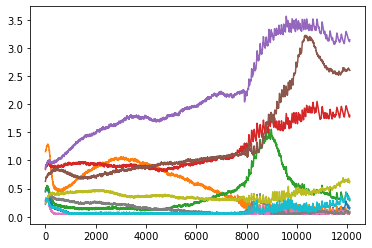

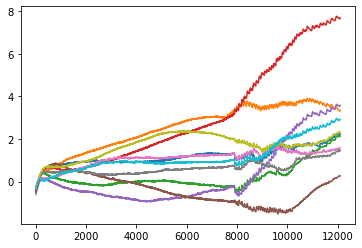

2.392937e+20 1.3560298e+19


In [106]:
plt.plot(results['v_gamma']); plt.show()
plt.plot(results['v_theta']); plt.show()
print( RBM.fantasy_v.max(), RBM.fantasy_h.max())